### Import Necessary Libraries

In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

### Load MNIST Data

In [2]:
print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')


Loading MNIST Data...


### Load Training Data

In [3]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Training Data...


### Load Testing Data



In [4]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


### Prepare Classifier Training and Validation Data

In [5]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_img, train_labels, test_size=0.1)


Preparing Classifier Training and Validation Data...


### Setup SVM Classifier

The line `clf = svm.SVC(gamma=0.1, kernel='poly')` is creating an instance of the Support Vector Classifier (SVC) from the `svm` module of Scikit-learn. Here's a breakdown of the parameters used:

- `gamma=0.1`: This parameter defines the influence of a single training example. In the context of the SVC, a small `gamma` value implies that the decision boundary will be smoother, while a large `gamma` means the model will fit more closely to the training data. Setting `gamma=0.1` means the influence of each support vector is moderately limited.

- `kernel='poly'`: This specifies the kernel type used in the SVC algorithm. The `'poly'` kernel represents a polynomial kernel, which is used to fit the decision boundary in the transformed feature space. It allows the model to capture non-linear relationships in the data.


In [6]:
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train, y_train)


SVM Classifier with gamma = 0.1; Kernel = polynomial


SVC(gamma=0.1, kernel='poly')

### Pickle the Classifier for Future Use



In [7]:
print('\nPickling the Classifier for Future Use...')
with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)


Pickling the Classifier for Future Use...


### Load Classifier from Pickle

In [8]:
# pickle_in = open('MNIST_SVM.pickle', 'rb')
# clf = pickle.load(pickle_in)

### Validate the Classifier

In [9]:
print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test, y_test)
print('\nSVM Trained Classifier Accuracy: ', acc)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)
print('\nPredicted Values: ', y_pred)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy of Classifier on Validation Images: ', accuracy)


Calculating Accuracy of trained Classifier...

SVM Trained Classifier Accuracy:  0.9773333333333334

Making Predictions on Validation Data...

Predicted Values:  [0 3 1 ... 9 8 5]

Calculating Accuracy of Predictions...

Accuracy of Classifier on Validation Images:  0.9773333333333334


### Create Confusion Matrix


Creating Confusion Matrix...


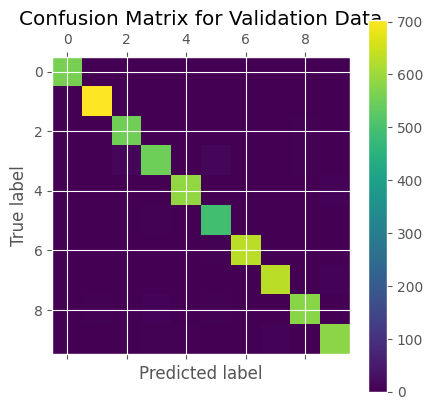

In [10]:
print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Test the Classifier


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Accuracy of Classifier on Test Images:  0.9783

Creating Confusion Matrix for Test Data...


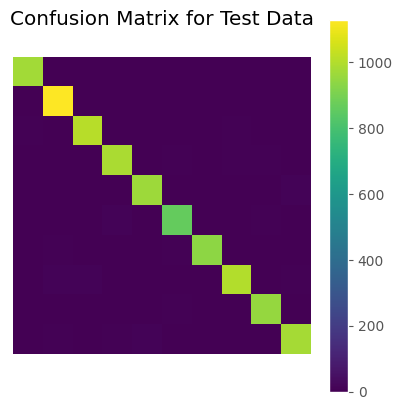

In [11]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

### Display Test Images with Predictions

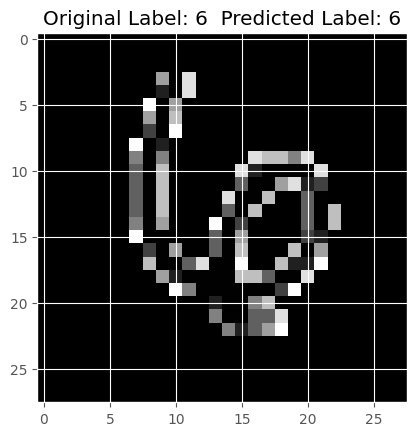

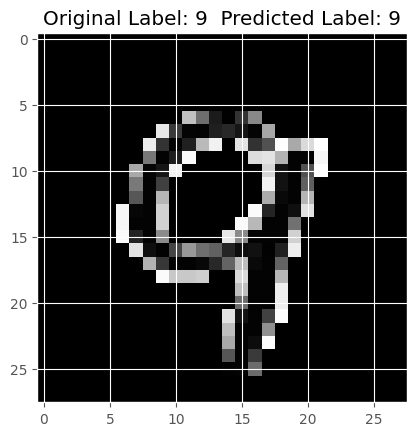

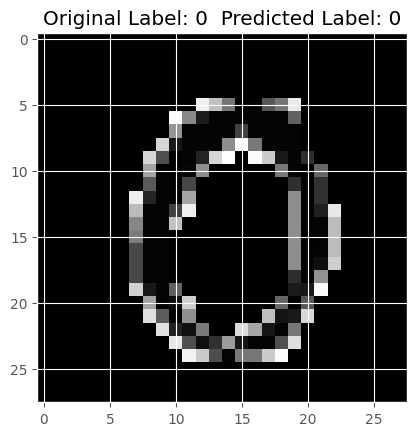

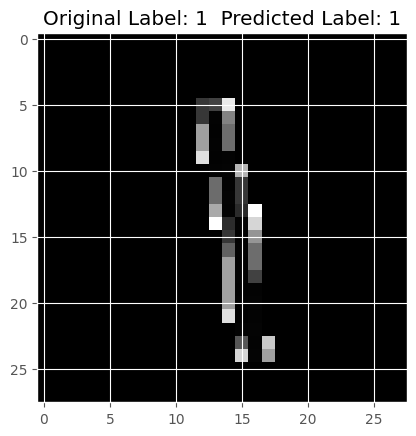

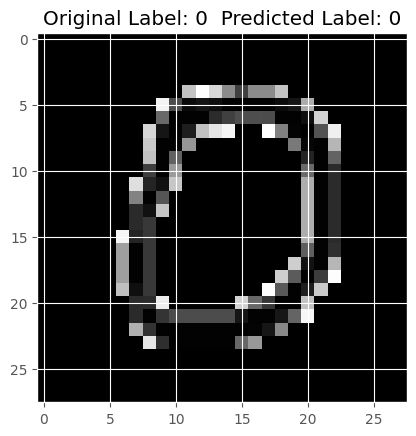

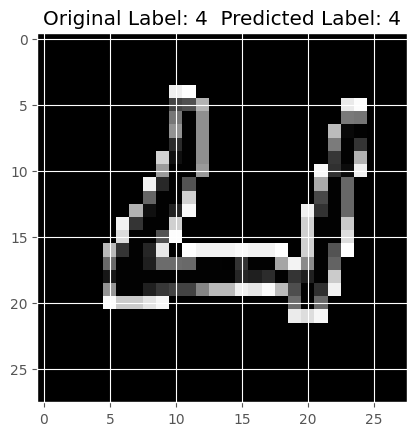

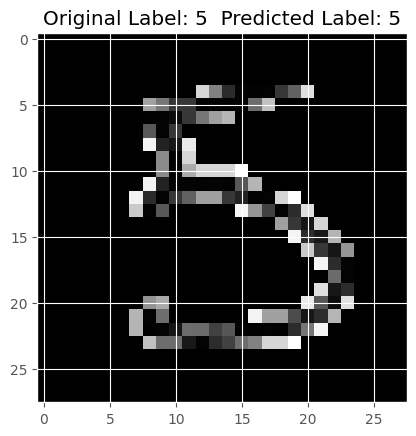

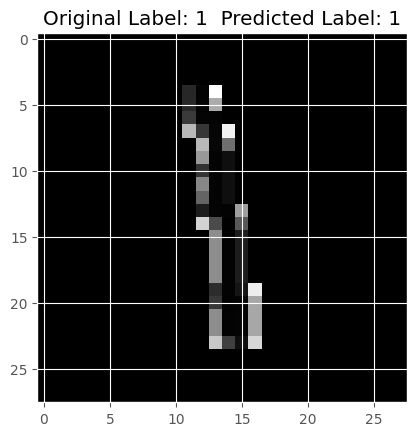

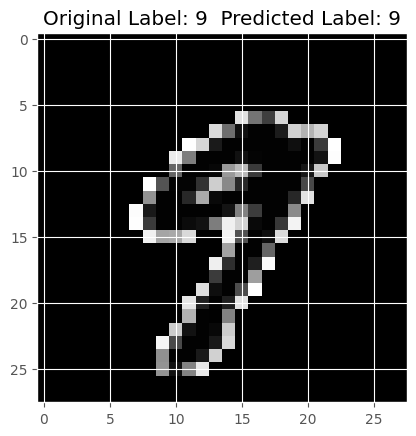

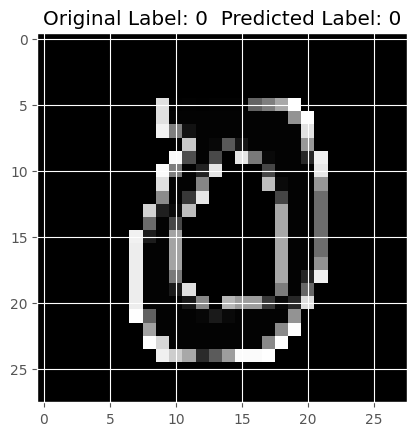

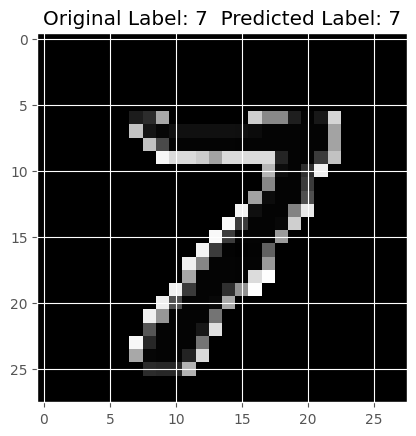

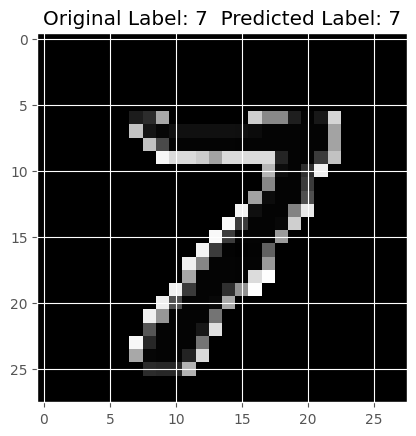

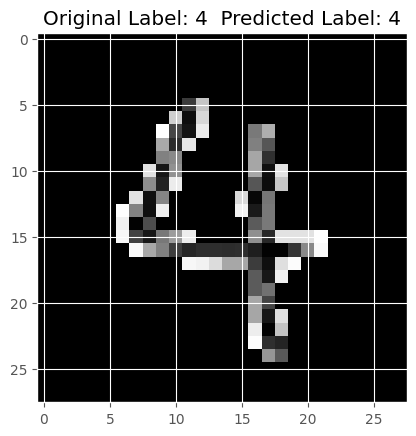

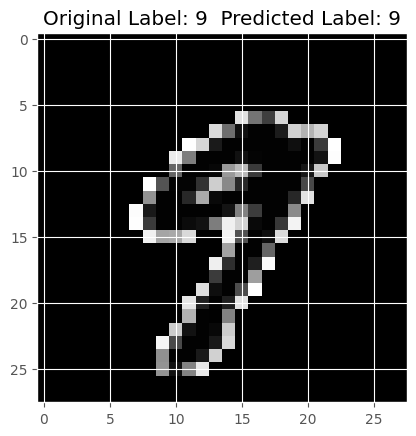

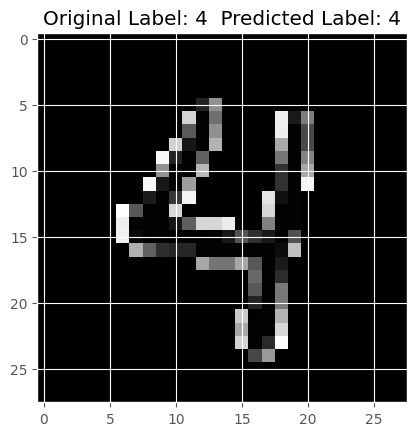

In [12]:
a = np.random.randint(1, 40, 15)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
